<a href="https://colab.research.google.com/github/nthnlgmz/OpenCV-Tutorial/blob/main/FACE_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/misbah4064/face_recognition.git
!pip install face_recognition
%cd face_recognition

Cloning into 'face_recognition'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 26 (delta 5), reused 23 (delta 3), pack-reused 0
Receiving objects: 100% (26/26), 3.03 MiB | 14.44 MiB/s, done.
Resolving deltas: 100% (5/5), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=61e61012b7d0dd17241d36cfe17db28b187a28d327abd65f424e3567917b86b9
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models
/content/face_recognition


In [2]:
import face_recognition
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

# Creating the encoding profiles
face_1 = face_recognition.load_image_file("elon.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("Donald Trump.jpg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file("jeffbezos.jpg")
face_3_encoding = face_recognition.face_encodings(face_3)[0]

known_face_encodings = [
                        face_1_encoding,
                        face_2_encoding,
                        face_3_encoding
]

known_face_names = [
                    "Elon Musk",
                    "Donald Trump",
                    "Jeff Bezos"
]

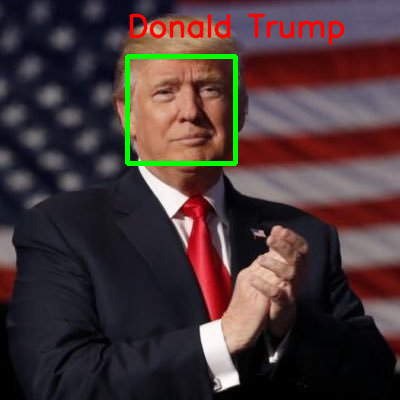

In [3]:
file_name = "unknown_do.jpg"
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

for (top,right, bottom, left), face_encoding in zip(face_locations, face_encodings):
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

  name = "Unknown"

  face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
  best_match_index = np.argmin(face_distances)
  if matches[best_match_index]:
    name = known_face_names[best_match_index]
  cv2.rectangle(unknown_image_to_draw, (left, top), (right, bottom),(0,255,0),3)
  cv2.putText(unknown_image_to_draw,name, (left, top-20), cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2, cv2.LINE_AA)

cv2_imshow(unknown_image_to_draw)
